In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#Reading the CSV file
telco_churn = pd.read_csv("Telco-Customer-Churn_Num_processed.csv")

In [3]:
telco_churn.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
MonthlyChargeInt      int64
dtype: object

In [4]:
#Dropping customer ID as it is unique and does not hold any significance
telco_churn.drop(labels=["customerID"],axis=1,inplace=True)

In [5]:
#Imputing the Total charges with value 0
telco_churn['TotalCharges'].fillna(0, inplace=True)

In [6]:
#Identifying if there are any missing values
telco_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
MonthlyChargeInt    0
dtype: int64

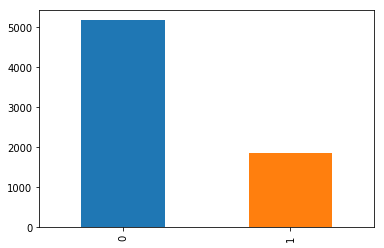

In [7]:
#Distribution of Churn vs Non-churn in the dataset
telco_churn['Churn'].value_counts().plot(kind='bar')

In [8]:
telco_churn=pd.get_dummies(data=telco_churn, columns=['InternetService','PaymentMethod'])

In [9]:
from sklearn.model_selection import train_test_split
telco_churn_train ,telco_churn_test = train_test_split(telco_churn,test_size=0.25)   

In [10]:
telco_churn_train_yes = telco_churn_train[telco_churn_train['Churn']==1]

In [11]:
telco_churn_train_no = telco_churn_train[telco_churn_train['Churn']==0]

In [12]:
#Creating the 1:1 subset dataset [1 churner : 1 Non churner]
telco_churn_train_yes_1to1=telco_churn_train_yes.sample(n=700, random_state=25)

In [13]:
telco_churn_train_no_1to1=telco_churn_train_no.sample(n=700, random_state=25)

In [14]:
#Creating the 1:2 subset dataset [1 churner : 2 Non churner]
telco_churn_train_yes_1to2=telco_churn_train_yes.sample(n=700, random_state=42)

In [15]:
telco_churn_train_no_1to2=telco_churn_train_no.sample(n=1400, random_state=42)

In [16]:
#Creating the 1:3 subset dataset [1 churner : 3 Non churner]
telco_churn_train_yes_1to3=telco_churn_train_yes.sample(n=700, random_state=42)

In [17]:
telco_churn_train_no_1to3=telco_churn_train_no.sample(n=2100, random_state=42)

In [18]:
#Creating the 1:4 subset dataset [1 churner : 4 Non churner]
telco_churn_train_yes_1to4=telco_churn_train_yes.sample(n=700, random_state=42)

In [19]:
telco_churn_train_no_1to4=telco_churn_train_no.sample(n=2800, random_state=42)

In [20]:
#Creating the 1:5 subset dataset [1 churner : 5 Non churner]
telco_churn_train_yes_1to5=telco_churn_train_yes.sample(n=700, random_state=50)

In [21]:
telco_churn_train_no_1to5=telco_churn_train_no.sample(n=3500, random_state=50)

In [22]:
frames_1to1 = [telco_churn_train_yes_1to1,telco_churn_train_no_1to1]

In [23]:
#Final 1:1 dataset (after concatenation of churners and non churners)
df_1to1 = pd.concat(frames_1to1)

In [24]:
#Final 1:2 dataset (after concatenation of churners and non churners)
frames_1to2 = [telco_churn_train_yes_1to2,telco_churn_train_no_1to2]
df_1to2 = pd.concat(frames_1to2)
print(df_1to2.shape)

(2100, 26)


In [25]:
#Final 1:3 dataset (after concatenation of churners and non churners)
frames_1to3 = [telco_churn_train_yes_1to3,telco_churn_train_no_1to3]
df_1to3 = pd.concat(frames_1to3)
print(df_1to3.shape)

(2800, 26)


In [26]:
#Final 1:4 dataset (after concatenation of churners and non churners)
frames_1to4 = [telco_churn_train_yes_1to4,telco_churn_train_no_1to4]
df_1to4 = pd.concat(frames_1to4)
print(df_1to4.shape)

(3500, 26)


In [27]:
#Final 1:5 dataset (after concatenation of churners and non churners)
frames_1to5 = [telco_churn_train_yes_1to5,telco_churn_train_no_1to5]
df_1to5 = pd.concat(frames_1to5)
print(df_1to5.shape)

(4200, 26)


# Performing calculations and running models for 1:n datasets


# [Model 1:1 - For every 1 churner we have 1 non churner in the dataset]

In [28]:
#1:1 churn model
y_churn_1to1 = df_1to1["Churn"].values
X_churn_1to1 = df_1to1.drop(labels = ["Churn"],axis = 1)

In [29]:
X_train_churn_1to1, X_test_churn_1to1, y_train_churn_1to1, y_test_churn_1to1 = train_test_split(X_churn_1to1, y_churn_1to1, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [31]:
#Logistic Regression on standardized dataset for 1:1 subset
lr=LogisticRegression()
lr_1to1=lr.fit(X_train_churn_1to1,y_train_churn_1to1)
lr_y_pred_churn_1to1=lr.predict(X_test_churn_1to1)
print("Accuracy of Logistic regression on 1:1 dataset is : ",accuracy_score(lr_y_pred_churn_1to1,y_test_churn_1to1))

lr_mse_churn_1to1 = mean_squared_error(y_test_churn_1to1,lr_y_pred_churn_1to1)
print("Mean Squared Error on Test for 1:1 using logistic regression: ", lr_mse_churn_1to1)

Accuracy of Logistic regression on 1:1 dataset is :  0.7892857142857143
Mean Squared Error on Test for 1:1 using logistic regression:  0.21071428571428572


C:\Users\Malty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [33]:
#Measures for logistic regssion 1to1 churn model
print("Measures for logistic regssion 1:1 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to1, lr_y_pred_churn_1to1))
print("Recall score: ",recall_score(y_test_churn_1to1, lr_y_pred_churn_1to1))
print("F1 score: ",f1_score(y_test_churn_1to1, lr_y_pred_churn_1to1))

Measures for logistic regssion 1:1 churn model 

Precision score:  0.7913669064748201
Recall score:  0.7857142857142857
F1 score:  0.7885304659498209


In [34]:
#Decision tree on standardized dataset for 1:1 subset
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=5)
clf_1to1=clf.fit(X_train_churn_1to1,y_train_churn_1to1)
clf_y_pred_churn_1to1 = clf.predict(X_test_churn_1to1)

print("Accuracy of Decision tree on 1:1 dataset is : ",accuracy_score(clf_y_pred_churn_1to1,y_test_churn_1to1))
clf_mse_churn_1to1 = mean_squared_error(y_test_churn_1to1,clf_y_pred_churn_1to1)
print("Mean Squared Error on Test for 1:1 using decision tree: ", clf_mse_churn_1to1)

Accuracy of Decision tree on 1:1 dataset is :  0.7785714285714286
Mean Squared Error on Test for 1:1 using decision tree:  0.22142857142857142


In [35]:
#Measures for Decision tree 1:1 churn model
print("Measures for decision tree 1:1 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to1, clf_y_pred_churn_1to1))
print("Recall score: ",recall_score(y_test_churn_1to1, clf_y_pred_churn_1to1))
print("F1 score: ",f1_score(y_test_churn_1to1, clf_y_pred_churn_1to1))

Measures for decision tree 1:1 churn model 

Precision score:  0.8
Recall score:  0.7428571428571429
F1 score:  0.7703703703703704


In [36]:
from sklearn.ensemble import RandomForestClassifier

#Random forest on standardized dataset for 1:1 subset
rnd_clf=RandomForestClassifier()
rnd_clf_1to1=rnd_clf.fit(X_train_churn_1to1,y_train_churn_1to1)
rnd_clf_y_pred_churn_1to1=rnd_clf.predict(X_test_churn_1to1)
print("Accuracy of Random forest on 1:1 dataset is : ",accuracy_score(rnd_clf_y_pred_churn_1to1,y_test_churn_1to1))

rnd_clf_mse_churn_1to1 = mean_squared_error(y_test_churn_1to1,rnd_clf_y_pred_churn_1to1)
print("Mean Squared Error on Test for 1:1 using decision tree: ", rnd_clf_mse_churn_1to1)

Accuracy of Random forest on 1:1 dataset is :  0.7214285714285714
Mean Squared Error on Test for 1:1 using decision tree:  0.2785714285714286


C:\Users\Malty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
#Measures for Random forest 1:1 churn model
print("Measures for random forest classifier 1:1 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to1, rnd_clf_y_pred_churn_1to1))
print("Recall score: ",recall_score(y_test_churn_1to1, rnd_clf_y_pred_churn_1to1))
print("F1 score: ",f1_score(y_test_churn_1to1, rnd_clf_y_pred_churn_1to1))

Measures for random forest classifier 1:1 churn model 

Precision score:  0.7719298245614035
Recall score:  0.6285714285714286
F1 score:  0.6929133858267716


## [Model 1:2 - For every 1 churner we have 2 non churners in the dataset]

In [38]:
#1:2 churn model
y_churn_1to2 = df_1to2["Churn"].values
X_churn_1to2 = df_1to2.drop(labels = ["Churn"],axis = 1)

In [39]:
X_train_churn_1to2, X_test_churn_1to2, y_train_churn_1to2, y_test_churn_1to2 = train_test_split(X_churn_1to2, y_churn_1to2, test_size=0.2, random_state=42)

In [40]:
#Logistic Regression on standardized dataset for 1:2 subset
lr=LogisticRegression()
lr_1to2=lr.fit(X_train_churn_1to2,y_train_churn_1to2)
lr_y_pred_churn_1to2=lr.predict(X_test_churn_1to2)
print("Accuracy of Logistic regression on 1:2 dataset is : ",accuracy_score(lr_y_pred_churn_1to2,y_test_churn_1to2))

lr_mse_churn_1to2 = mean_squared_error(y_test_churn_1to2,lr_y_pred_churn_1to2)
print("Mean Squared Error on Test for 1:2 using logistic regression: ", lr_mse_churn_1to2)

Accuracy of Logistic regression on 1:2 dataset is :  0.7595238095238095
Mean Squared Error on Test for 1:2 using logistic regression:  0.24047619047619048


C:\Users\Malty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
#Measures for logistic regssion 1:2 churn model
print("Measures for logistic regression 1:2 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to2, lr_y_pred_churn_1to2))
print("Recall score: ",recall_score(y_test_churn_1to2, lr_y_pred_churn_1to2))
print("F1 score: ",f1_score(y_test_churn_1to2, lr_y_pred_churn_1to2))

Measures for logistic regression 1:2 churn model 

Precision score:  0.673469387755102
Recall score:  0.6513157894736842
F1 score:  0.6622073578595318


In [42]:
#Decision tree on standardized dataset for 1:2 subset
clf = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=5)
clf_1to2=clf.fit(X_train_churn_1to2,y_train_churn_1to2)
clf_y_pred_churn_1to2 = clf.predict(X_test_churn_1to2)
print("Accuracy of Decision tree on 1:2 dataset is : ",accuracy_score(clf_y_pred_churn_1to2,y_test_churn_1to2))

clf_mse_churn_1to2 = mean_squared_error(y_test_churn_1to2,clf_y_pred_churn_1to2)
print("Mean Squared Error on Test for 1:2 using decision tree: ", clf_mse_churn_1to2)

Accuracy of Decision tree on 1:2 dataset is :  0.7404761904761905
Mean Squared Error on Test for 1:2 using decision tree:  0.25952380952380955


In [43]:
#Measures for Decision tree 1:2 churn model
print("Measures for decision tree 1:2 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to2, clf_y_pred_churn_1to2))
print("Recall score: ",recall_score(y_test_churn_1to2, clf_y_pred_churn_1to2))
print("F1 score: ",f1_score(y_test_churn_1to2, clf_y_pred_churn_1to2))

Measures for decision tree 1:2 churn model 

Precision score:  0.7471264367816092
Recall score:  0.4276315789473684
F1 score:  0.5439330543933054


In [44]:
#Random forest on standardized dataset for 1:2 subset
rnd_clf=RandomForestClassifier()
rnd_clf_1to2=rnd_clf.fit(X_train_churn_1to2,y_train_churn_1to2)
rnd_clf_y_pred_churn_1to2=rnd_clf.predict(X_test_churn_1to2)
print("Accuracy of Random forest on 1:2 dataset is : ",accuracy_score(rnd_clf_y_pred_churn_1to2,y_test_churn_1to2))

rnd_clf_mse_churn_1to2 = mean_squared_error(y_test_churn_1to2,rnd_clf_y_pred_churn_1to2)
print("Mean Squared Error on Test for 1:2 using decision tree: ", rnd_clf_mse_churn_1to2)

C:\Users\Malty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random forest on 1:2 dataset is :  0.7214285714285714
Mean Squared Error on Test for 1:2 using decision tree:  0.2785714285714286


In [45]:
#Measures for Random forest 1:2 churn model
print("Measures for random forest classifier 1:2 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to2, rnd_clf_y_pred_churn_1to2))
print("Recall score: ",recall_score(y_test_churn_1to2, rnd_clf_y_pred_churn_1to2))
print("F1 score: ",f1_score(y_test_churn_1to2, rnd_clf_y_pred_churn_1to2))

Measures for random forest classifier 1:2 churn model 

Precision score:  0.6356589147286822
Recall score:  0.5394736842105263
F1 score:  0.5836298932384342


# [Model 1:3 - For every 1 churner we have 3 non churners in the dataset]

In [46]:
#1:3 churn model
y_churn_1to3 = df_1to3["Churn"].values
X_churn_1to3 = df_1to3.drop(labels = ["Churn"],axis = 1)

In [47]:
X_train_churn_1to3, X_test_churn_1to3, y_train_churn_1to3, y_test_churn_1to3 = train_test_split(X_churn_1to3, y_churn_1to3, test_size=0.2, random_state=42)

In [48]:
#Logistic Regression on standardized dataset for 1:3 subset
lr=LogisticRegression()
lr_1to3=lr.fit(X_train_churn_1to3,y_train_churn_1to3)
lr_y_pred_churn_1to3=lr.predict(X_test_churn_1to3)
print("Accuracy of Logistic regression on 1:3 dataset is : ",accuracy_score(lr_y_pred_churn_1to3,y_test_churn_1to3))

lr_mse_churn_1to3 = mean_squared_error(y_test_churn_1to3,lr_y_pred_churn_1to3)
print("Mean Squared Error on Test for 1:3 using logistic regression: ", lr_mse_churn_1to3)

Accuracy of Logistic regression on 1:3 dataset is :  0.8303571428571429
Mean Squared Error on Test for 1:3 using logistic regression:  0.16964285714285715


C:\Users\Malty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
#Measures for logistic regssion 1:3 churn model
print("Measures for logistic regression 1:3 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to3, lr_y_pred_churn_1to3))
print("Recall score: ",recall_score(y_test_churn_1to3, lr_y_pred_churn_1to3))
print("F1 score: ",f1_score(y_test_churn_1to3, lr_y_pred_churn_1to3))

Measures for logistic regression 1:3 churn model 

Precision score:  0.7079646017699115
Recall score:  0.5633802816901409
F1 score:  0.627450980392157


In [50]:
#Decision tree on standardized dataset for 1:3 subset
clf = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=5)
clf_1to3=clf.fit(X_train_churn_1to3,y_train_churn_1to3)
clf_y_pred_churn_1to3 = clf.predict(X_test_churn_1to3)
print("Accuracy of Decision tree on 1:3 dataset is : ",accuracy_score(clf_y_pred_churn_1to3,y_test_churn_1to3))

clf_mse_churn_1to3 = mean_squared_error(y_test_churn_1to3,clf_y_pred_churn_1to3)
print("Mean Squared Error on Test for 1:2 using decision tree: ", clf_mse_churn_1to3)

Accuracy of Decision tree on 1:3 dataset is :  0.8196428571428571
Mean Squared Error on Test for 1:2 using decision tree:  0.18035714285714285


In [51]:
#Measures for Decision tree 1:3 churn model
print("Measures for decision tree 1:3 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to3, clf_y_pred_churn_1to3))
print("Recall score: ",recall_score(y_test_churn_1to3, clf_y_pred_churn_1to3))
print("F1 score: ",f1_score(y_test_churn_1to3, clf_y_pred_churn_1to3))

Measures for decision tree 1:3 churn model 

Precision score:  0.6952380952380952
Recall score:  0.5140845070422535
F1 score:  0.5910931174089068


In [52]:
#Random forest on standardized dataset for 1:3 subset
rnd_clf=RandomForestClassifier()
rnd_clf_1to3=rnd_clf.fit(X_train_churn_1to3,y_train_churn_1to3)
rnd_clf_y_pred_churn_1to3=rnd_clf.predict(X_test_churn_1to3)
print("Accuracy of Random forest on 1:3 dataset is : ",accuracy_score(rnd_clf_y_pred_churn_1to3,y_test_churn_1to3))

rnd_clf_mse_churn_1to3 = mean_squared_error(y_test_churn_1to3,rnd_clf_y_pred_churn_1to3)
print("Mean Squared Error on Test for 1:3 using decision tree: ", rnd_clf_mse_churn_1to3)

C:\Users\Malty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random forest on 1:3 dataset is :  0.7785714285714286
Mean Squared Error on Test for 1:3 using decision tree:  0.22142857142857142


In [53]:
#Measures for Random forest 1:3 churn model
print("Measures for random forest classifier 1:3 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to3, rnd_clf_y_pred_churn_1to3))
print("Recall score: ",recall_score(y_test_churn_1to3, rnd_clf_y_pred_churn_1to3))
print("F1 score: ",f1_score(y_test_churn_1to3, rnd_clf_y_pred_churn_1to3))

Measures for random forest classifier 1:3 churn model 

Precision score:  0.59375
Recall score:  0.4014084507042254
F1 score:  0.4789915966386555


## [Model 1:4 - For every 1 churner we have 4 non churners in the dataset]

In [54]:
#1:4 churn model
y_churn_1to4 = df_1to4["Churn"].values
X_churn_1to4 = df_1to4.drop(labels = ["Churn"],axis = 1)

In [55]:
X_train_churn_1to4, X_test_churn_1to4, y_train_churn_1to4, y_test_churn_1to4 = train_test_split(X_churn_1to4, y_churn_1to4, test_size=0.2, random_state=42)

In [56]:
#Logistic Regression on standardized dataset for 1:4 subset
lr=LogisticRegression()
lr_1to4=lr.fit(X_train_churn_1to4,y_train_churn_1to4)
lr_y_pred_churn_1to4=lr.predict(X_test_churn_1to4)
print("Accuracy of Logistic regression on 1:4 dataset is : ",accuracy_score(lr_y_pred_churn_1to4,y_test_churn_1to4))

lr_mse_churn_1to4 = mean_squared_error(y_test_churn_1to4,lr_y_pred_churn_1to4)
print("Mean Squared Error on Test for 1:4 using logistic regression: ", lr_mse_churn_1to4)

Accuracy of Logistic regression on 1:4 dataset is :  0.8057142857142857
Mean Squared Error on Test for 1:4 using logistic regression:  0.19428571428571428


C:\Users\Malty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
#Measures for logistic regssion 1:4 churn model
print("Measures for logistic regression 1:4 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to4, lr_y_pred_churn_1to4))
print("Recall score: ",recall_score(y_test_churn_1to4, lr_y_pred_churn_1to4))
print("F1 score: ",f1_score(y_test_churn_1to4, lr_y_pred_churn_1to4))

Measures for logistic regression 1:4 churn model 

Precision score:  0.6867469879518072
Recall score:  0.3413173652694611
F1 score:  0.456


In [58]:
#Decision tree on standardized dataset for 1:4 subset
clf = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=5)
clf_1to4=clf.fit(X_train_churn_1to4,y_train_churn_1to4)
clf_y_pred_churn_1to4 = clf.predict(X_test_churn_1to4)
print("Accuracy of Decision tree on 1:4 dataset is : ",accuracy_score(clf_y_pred_churn_1to4,y_test_churn_1to4))

clf_mse_churn_1to4 = mean_squared_error(y_test_churn_1to4,clf_y_pred_churn_1to4)
print("Mean Squared Error on Test for 1:4 using decision tree: ", clf_mse_churn_1to4)

Accuracy of Decision tree on 1:4 dataset is :  0.7842857142857143
Mean Squared Error on Test for 1:4 using decision tree:  0.21571428571428572


In [59]:
#Measures for Decision tree 1:4 churn model
print("Measures for decision tree 1:4 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to4, clf_y_pred_churn_1to4))
print("Recall score: ",recall_score(y_test_churn_1to4, clf_y_pred_churn_1to4))
print("F1 score: ",f1_score(y_test_churn_1to4, clf_y_pred_churn_1to4))

Measures for decision tree 1:4 churn model 

Precision score:  0.7857142857142857
Recall score:  0.1317365269461078
F1 score:  0.22564102564102564


In [60]:
#Random forest on standardized dataset for 1:4 subset
rnd_clf=RandomForestClassifier()
rnd_clf_1to4=rnd_clf.fit(X_train_churn_1to4,y_train_churn_1to4)
rnd_clf_y_pred_churn_1to4=rnd_clf.predict(X_test_churn_1to4)
print("Accuracy of Random forest on 1:4 dataset is : ",accuracy_score(rnd_clf_y_pred_churn_1to4,y_test_churn_1to4))

rnd_clf_mse_churn_1to4 = mean_squared_error(y_test_churn_1to4,rnd_clf_y_pred_churn_1to4)
print("Mean Squared Error on Test for 1:4 using decision tree: ", rnd_clf_mse_churn_1to4)

Accuracy of Random forest on 1:4 dataset is :  0.7842857142857143
Mean Squared Error on Test for 1:4 using decision tree:  0.21571428571428572


C:\Users\Malty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [61]:
#Measures for Random forest 1:4 churn model
print("Measures for random forest classifier 1:4 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to4, rnd_clf_y_pred_churn_1to4))
print("Recall score: ",recall_score(y_test_churn_1to4, rnd_clf_y_pred_churn_1to4))
print("F1 score: ",f1_score(y_test_churn_1to4, rnd_clf_y_pred_churn_1to4))

Measures for random forest classifier 1:4 churn model 

Precision score:  0.6212121212121212
Recall score:  0.24550898203592814
F1 score:  0.351931330472103


## [Model 1:5 - For every 1 churner we have 5 non churners in the dataset]

In [62]:
#1:5 churn model
y_churn_1to5 = df_1to5["Churn"].values
X_churn_1to5 = df_1to5.drop(labels = ["Churn"],axis = 1)

In [63]:
X_train_churn_1to5, X_test_churn_1to5, y_train_churn_1to5, y_test_churn_1to5 = train_test_split(X_churn_1to5, y_churn_1to5, test_size=0.2, random_state=42)

In [64]:
#Logistic Regression on standardized dataset for 1:5 subset
lr=LogisticRegression()
lr_1to5=lr.fit(X_train_churn_1to5,y_train_churn_1to5)
lr_y_pred_churn_1to5=lr.predict(X_test_churn_1to5)
print("Accuracy of Logistic regression on 1:5 dataset is : ",accuracy_score(lr_y_pred_churn_1to5,y_test_churn_1to5))

lr_mse_churn_1to5 = mean_squared_error(y_test_churn_1to5,lr_y_pred_churn_1to5)
print("Mean Squared Error on Test for 1:5 using logistic regression: ", lr_mse_churn_1to5)

Accuracy of Logistic regression on 1:5 dataset is :  0.8464285714285714
Mean Squared Error on Test for 1:5 using logistic regression:  0.15357142857142858


C:\Users\Malty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
#Measures for logistic regssion 1:5 churn model
print("Measures for logistic regression 1:5 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to5, lr_y_pred_churn_1to5))
print("Recall score: ",recall_score(y_test_churn_1to5, lr_y_pred_churn_1to5))
print("F1 score: ",f1_score(y_test_churn_1to5, lr_y_pred_churn_1to5))

Measures for logistic regression 1:5 churn model 

Precision score:  0.7361111111111112
Recall score:  0.32515337423312884
F1 score:  0.45106382978723414


In [66]:
#Decision tree on standardized dataset for 1:5 subset
clf = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=5)
clf_1to5=clf.fit(X_train_churn_1to5,y_train_churn_1to5)
clf_y_pred_churn_1to5 = clf.predict(X_test_churn_1to5)
print("Accuracy of Decision tree on 1:5 dataset is : ",accuracy_score(clf_y_pred_churn_1to5,y_test_churn_1to5))

clf_mse_churn_1to5 = mean_squared_error(y_test_churn_1to5,clf_y_pred_churn_1to5)
print("Mean Squared Error on Test for 1:5 using decision tree: ", clf_mse_churn_1to5)

Accuracy of Decision tree on 1:5 dataset is :  0.8321428571428572
Mean Squared Error on Test for 1:5 using decision tree:  0.16785714285714284


In [67]:
#Measures for Decision tree 1:5 churn model
print("Measures for decision tree 1:5 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to5, clf_y_pred_churn_1to5))
print("Recall score: ",recall_score(y_test_churn_1to5, clf_y_pred_churn_1to5))
print("F1 score: ",f1_score(y_test_churn_1to5, clf_y_pred_churn_1to5))

Measures for decision tree 1:5 churn model 

Precision score:  0.6170212765957447
Recall score:  0.3558282208588957
F1 score:  0.4513618677042801


In [68]:
#Random forest on 1:5 sampled dataset
rnd_clf=RandomForestClassifier()
rnd_clf_1to5=rnd_clf.fit(X_train_churn_1to5,y_train_churn_1to5)
rnd_clf_y_pred_churn_1to5=rnd_clf.predict(X_test_churn_1to5)
print("Accuracy of Random forest on 1:5 dataset is : ",accuracy_score(rnd_clf_y_pred_churn_1to5,y_test_churn_1to5))

rnd_clf_mse_churn_1to5 = mean_squared_error(y_test_churn_1to5,rnd_clf_y_pred_churn_1to5)
print("Mean Squared Error on Test for 1:5 using decision tree: ", rnd_clf_mse_churn_1to5)

C:\Users\Malty\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random forest on 1:5 dataset is :  0.8321428571428572
Mean Squared Error on Test for 1:5 using decision tree:  0.16785714285714284


In [69]:
#Random forest on standardized dataset for 1:5 subset
print("Measures for random forest classifier 1:5 churn model \n")
print("Precision score: ",precision_score(y_test_churn_1to5, rnd_clf_y_pred_churn_1to5))
print("Recall score: ",recall_score(y_test_churn_1to5, rnd_clf_y_pred_churn_1to5))
print("F1 score: ",f1_score(y_test_churn_1to5, rnd_clf_y_pred_churn_1to5))

Measures for random forest classifier 1:5 churn model 

Precision score:  0.6447368421052632
Recall score:  0.3006134969325153
F1 score:  0.4100418410041841


# The below piece of code for vizualizing Confusion matrix and AUC curve is referred from https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction

In [70]:
import seaborn as sns#visualization
import itertools

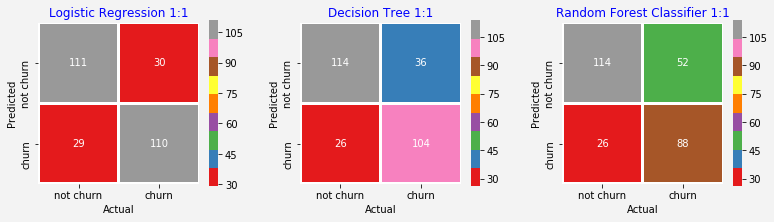

In [71]:
lst    = [lr_1to1,clf_1to1,rnd_clf_1to1]
length = len(lst)

mods   = ['Logistic Regression 1:1','Decision Tree 1:1','Random Forest Classifier 1:1']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test_churn_1to1)
    conf_matrix = confusion_matrix(predictions,y_test_churn_1to1)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

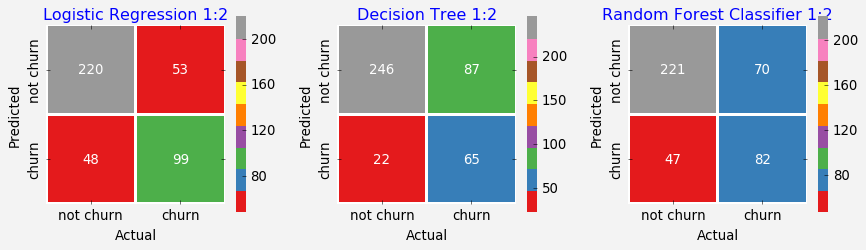

In [72]:
lst    = [lr_1to2,clf_1to2,rnd_clf_1to2]
length = len(lst)

mods   = ['Logistic Regression 1:2','Decision Tree 1:2','Random Forest Classifier 1:2']

plt.style.use("classic")
fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test_churn_1to2)
    conf_matrix = confusion_matrix(predictions,y_test_churn_1to2)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

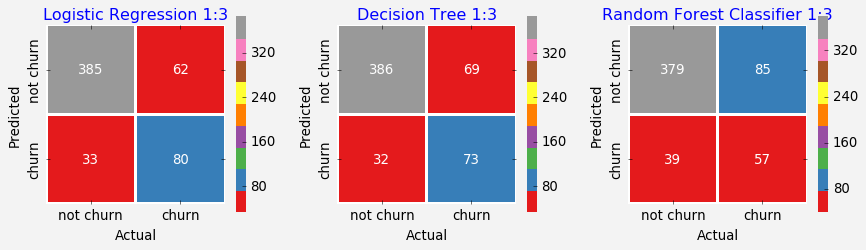

In [73]:
lst    = [lr_1to3,clf_1to3,rnd_clf_1to3]
length = len(lst)

mods   = ['Logistic Regression 1:3','Decision Tree 1:3','Random Forest Classifier 1:3']

plt.style.use("classic")
fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test_churn_1to3)
    conf_matrix = confusion_matrix(predictions,y_test_churn_1to3)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

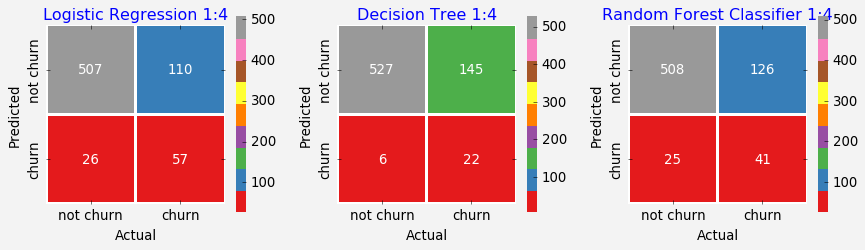

In [74]:
lst    = [lr_1to4,clf_1to4,rnd_clf_1to4]
length = len(lst)

mods   = ['Logistic Regression 1:4','Decision Tree 1:4','Random Forest Classifier 1:4']

plt.style.use("classic")
fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test_churn_1to4)
    conf_matrix = confusion_matrix(predictions,y_test_churn_1to4)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

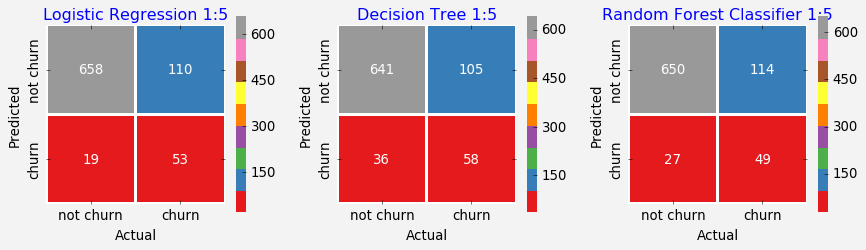

In [75]:
lst    = [lr_1to5,clf_1to5,rnd_clf_1to5]
length = len(lst)

mods   = ['Logistic Regression 1:5','Decision Tree 1:5','Random Forest Classifier 1:5']

plt.style.use("classic")
fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_test_churn_1to5)
    conf_matrix = confusion_matrix(predictions,y_test_churn_1to5)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

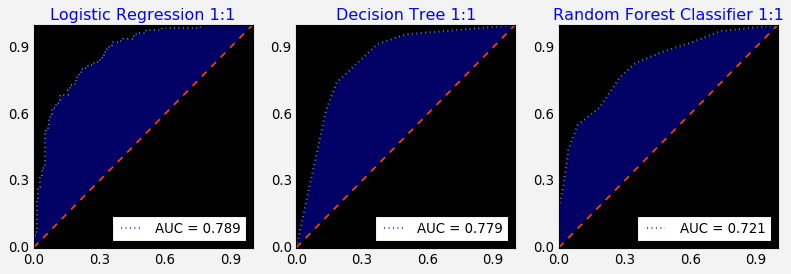

In [76]:
lst    = [lr_1to1,clf_1to1,rnd_clf_1to1]

length = len(lst)

mods   = ['Logistic Regression 1:1','Decision Tree 1:1','Random Forest Classifier 1:1']

#plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test_churn_1to1)
    predictions   = i.predict(X_test_churn_1to1)
    fpr,tpr,thresholds = roc_curve(y_test_churn_1to1,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test_churn_1to1,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

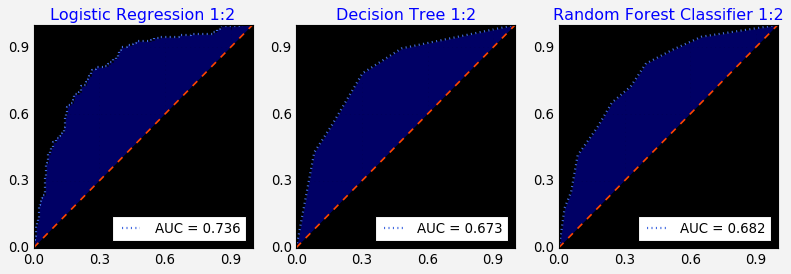

In [77]:
lst    = [lr_1to2,clf_1to2,rnd_clf_1to2]

length = len(lst)

mods   = ['Logistic Regression 1:2','Decision Tree 1:2','Random Forest Classifier 1:2']

#plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test_churn_1to2)
    predictions   = i.predict(X_test_churn_1to2)
    fpr,tpr,thresholds = roc_curve(y_test_churn_1to2,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test_churn_1to2,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

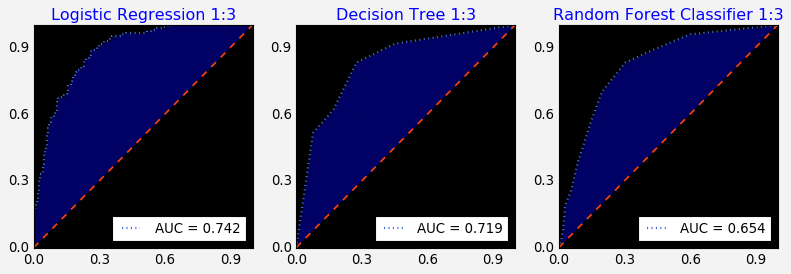

In [78]:
lst    = [lr_1to3,clf_1to3,rnd_clf_1to3]

length = len(lst)

mods   = ['Logistic Regression 1:3','Decision Tree 1:3','Random Forest Classifier 1:3']

#plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test_churn_1to3)
    predictions   = i.predict(X_test_churn_1to3)
    fpr,tpr,thresholds = roc_curve(y_test_churn_1to3,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test_churn_1to3,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

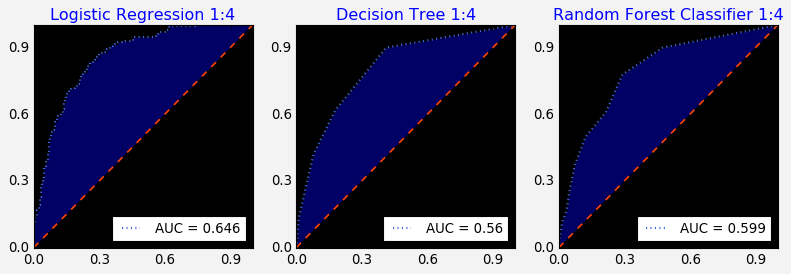

In [79]:
lst    = [lr_1to4,clf_1to4,rnd_clf_1to4]

length = len(lst)

mods   = ['Logistic Regression 1:4','Decision Tree 1:4','Random Forest Classifier 1:4']

#plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test_churn_1to4)
    predictions   = i.predict(X_test_churn_1to4)
    fpr,tpr,thresholds = roc_curve(y_test_churn_1to4,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test_churn_1to4,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

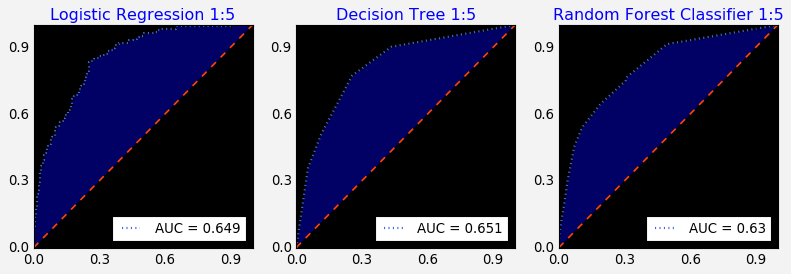

In [80]:
lst    = [lr_1to5,clf_1to5,rnd_clf_1to5]

length = len(lst)

mods   = ['Logistic Regression 1:5','Decision Tree 1:5','Random Forest Classifier 1:5']

#plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test_churn_1to5)
    predictions   = i.predict(X_test_churn_1to5)
    fpr,tpr,thresholds = roc_curve(y_test_churn_1to5,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test_churn_1to5,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

In [81]:
#Initial train and test dataset (main dataset before applying 1:n samples)
y_telco_churn_train = telco_churn_train["Churn"].values
X_telco_churn_train = telco_churn_train.drop(labels = ["Churn"],axis = 1)


In [82]:
y_telco_churn_test = telco_churn_test["Churn"].values
X_telco_churn_test = telco_churn_test.drop(labels = ["Churn"],axis = 1)

## From the cost matrix and other metrics, we found the Logistic regression performed better in all the subsets. Hence applying logistic regression to the original test set

In [83]:
#Logistic Regression on standardized 25% test dataset
lr=LogisticRegression()
lr_telco_churn=lr.fit(X_telco_churn_train,y_telco_churn_train)
lr_y_pred_telco_churn=lr.predict(X_telco_churn_test)
print("Accuracy of Logistic regression on test dataset is : ",accuracy_score(lr_y_pred_telco_churn,y_telco_churn_test))
lr_mse_telco_churn = mean_squared_error(y_telco_churn_test,lr_y_pred_telco_churn)
print("Mean Squared Error on Test for test dataset using logistic regression: ", lr_mse_telco_churn)

Accuracy of Logistic regression on test dataset is :  0.8137421919363997
Mean Squared Error on Test for test dataset using logistic regression:  0.18625780806360023


C:\Users\Malty\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
#Measures for logistic regssion for the 25% test dataset
print("Measures for logistic regression for test dataset \n")
print("Precision score: ",precision_score(y_telco_churn_test, lr_y_pred_telco_churn))
print("Recall score: ",recall_score(y_telco_churn_test, lr_y_pred_telco_churn))
print("F1 score: ",f1_score(y_telco_churn_test, lr_y_pred_telco_churn))

Measures for logistic regression for test dataset 

Precision score:  0.6518518518518519
Recall score:  0.5853658536585366
F1 score:  0.616822429906542


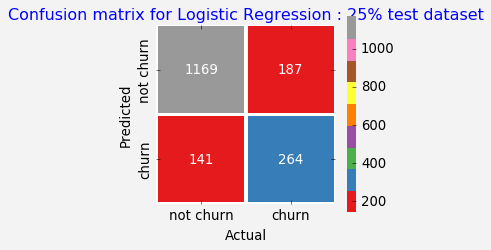

In [85]:
list_test    = [lr_telco_churn]
length = len(list_test)

mods   = ['Confusion matrix for Logistic Regression : 25% test dataset']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(list_test,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(X_telco_churn_test)
    conf_matrix = confusion_matrix(predictions,y_telco_churn_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=(["not churn","churn"]),
                yticklabels=(["not churn","churn"]),
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.xlabel("Actual",color="black")
    plt.ylabel("Predicted",color="black")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

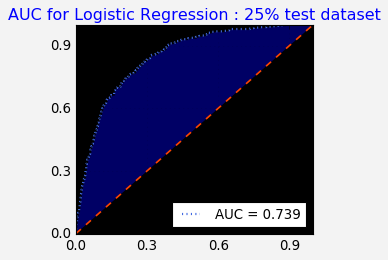

In [86]:
lst    = [lr_telco_churn]

length = len(lst)

mods   = ['AUC for Logistic Regression : 25% test dataset']

#plt.style.use("dark_background")
fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_telco_churn_test)
    predictions   = i.predict(X_telco_churn_test)
    fpr,tpr,thresholds = roc_curve(y_telco_churn_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_telco_churn_test,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))